# MODEL EVALUATION
load dependencies

In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pickle

load linear model save file

In [3]:
filename = 'apnea_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))

load testing data and name variables

In [4]:
x_col = 'Risk%'
testing_data = pd.read_csv('testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['AHI'])

use linear model to graph linear prediction

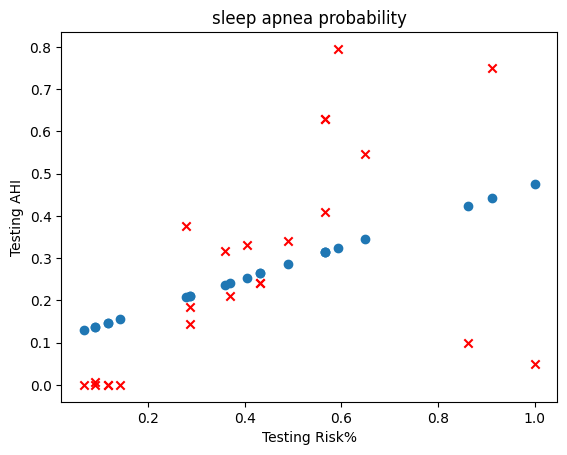

In [5]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("sleep apnea probability")
plt.xlabel(f'Testing {x_col}')
plt.ylabel(f'Testing AHI')
plt.show()

graph deviation

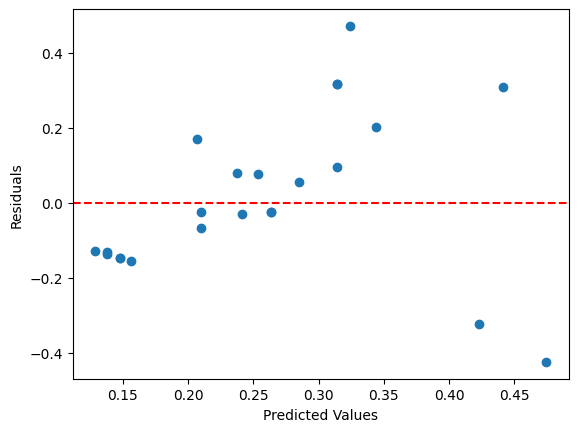

In [6]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

return score based on model accuracy

In [7]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.28064559712871817


calcuate cost

In [8]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

      Record  Length  Predicted result   Loss
0   1.000000   0.050          0.474320 -0.420
1   0.489061   0.340          0.285200  0.050
2   0.404208   0.330          0.253792  0.080
3   0.861346   0.100          0.422998 -0.320
4   0.360023   0.317          0.237437  0.077
5   0.090148   0.000          0.137544 -0.140
6   0.117393   0.000          0.147629 -0.150
7   0.593613   0.795          0.323899  0.475
8   0.566532   0.630          0.313875  0.320
9   0.286142   0.185          0.210090 -0.025
10  0.911220   0.750          0.441459  0.310
11  0.286142   0.143          0.210090 -0.067
12  0.648346   0.547          0.344158  0.207
13  0.117393   0.000          0.147629 -0.150
14  0.566532   0.410          0.313875  0.100
15  0.369921   0.210          0.241101 -0.030
16  0.277612   0.377          0.206933  0.167
17  0.090148   0.007          0.137544 -0.133
18  0.141080   0.000          0.156396 -0.160
19  0.431407   0.240          0.263859 -0.020
20  0.566532   0.630          0.31

find x intercept and gradient

In [9]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: 0.10417649723067474
Coefficient: [0.37014382]
